# Exercice 1: Création et manipulation d'une base de données simple
O. Kaufmann 2018, 2021

<div class="alert alert-block alert-info">
    <b>Tip:</b> Exécuter une à une les cellules déjà présentes en prenant soin de comprendre leur contenu.<br>
    Compléter le notebook là où c'est nécessaire. Un encadré vert expliquant le complément attendu précède la section à compléter.
</div>

<div class="alert alert-block alert-warning">
    <b>Avertissement:</b><br> Ce notebook nécessite que les packages matplotlib, ipython-sql, pandas et eralchemy soient installés.<br>
    Si ce n'est pas le cas, les installer dans le terminal avec la commande ci-dessous: <br>
     <code>pipenv install matplotlib ipython-sql eralchemy pandas</code> <br>
    puis redémarrer le kernel python du notebook.
</div> 

### Chargement des packages python
<div class="alert alert-block alert-info">
    <i>matplotlib</i> sert à créer des graphiques au départ de données<br>
    <i>pandas</i> sert à manipuler des tableaux<br>
    <i>render_er</i> sert à créer une représentation graphique de la base de données<br> 
    <i>SVG</i> sert à afficher des graphiques SVG dans le notebook
</div>  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from eralchemy import render_er
from IPython.display import SVG

### Chargement de l'extension et ouverture d'une base de donnée sqlite3

Charger l'extension de Jupyter pour traiter SQL

In [2]:
%load_ext sql

Obtenir de l'aide sur une fonction dans un notebook avec '?'

In [4]:
? %%sql

Effacer le fichier de la base de données si il existe...
<div class="alert alert-block alert-info">
    <b>Tip:</b> Le point d'exclamation en début de ligne permet d'exécuter des commandes bash depuis le notebook
</div>  

In [5]:
! rm example_db.db

Création d'une base de données vide (car elle n'existe pas puisqu'on vient d'effacer le fichier!)  
<div class="alert alert-block alert-info">
    <b>Tip:</b> Si le fichier existait, on pourrait se connecter à la base existante de la même façon...
</div>  

In [6]:
%sql sqlite:///example_db.db

### Création des tables

In [8]:
%%sql 
CREATE TABLE ouvrages(
    nom TEXT PRIMARY KEY,
    commune TEXT  
);

 * sqlite:///example_db.db
(sqlite3.OperationalError) table ouvrages already exists
[SQL: CREATE TABLE ouvrages( nom TEXT PRIMARY KEY,
    commune TEXT  
);]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [9]:
%%sql
CREATE TABLE piezometres(
    nom TEXT, 
    enregistreur TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [10]:
%%sql
CREATE TABLE puits_captages(
    nom TEXT,
    type_pompe TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [11]:
%%sql
CREATE TABLE prelevements(
    nom_puits TEXT,
    annee INTEGER,
    volume REAL,
    PRIMARY KEY(nom_puits, annee),
    FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE
    );

 * sqlite:///example_db.db
Done.


[]

### Afficher le schéma de la base de données sous forme graphique  
<div class="alert alert-block alert-info">
    <b>Tip:</b> render_er crée un fichier .svg du schéma de la base de données qui est ensuite affiché dans le notebook avec la commande SVG()
</div>  

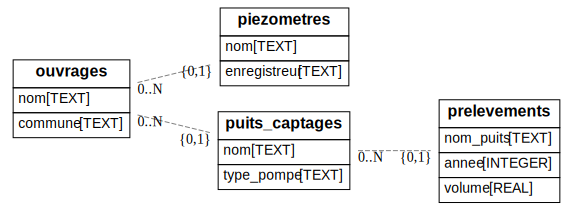

In [12]:
render_er('sqlite:///example_db.db', 'example_db_schema.svg')
SVG('example_db_schema.svg')

<div class="alert alert-block alert-success">
    Ajouter la définition de la table "niveaux" reprenant les niveaux relevés dans les piezomètres.<br> 
    Les champs seront nommés "nom_piezo", "date_releve" et "niveau"
</div>  

### Activer de l'intégrité référentielle
<div class="alert alert-block alert-info">
    <b>Tip:</b> pour des raisons de rétro-compatibilité, l'intégrité référentielle n'est pas activée par défaut dans sqlite...
</div>  

In [ ]:
%%sql
PRAGMA foreign_keys = ON;
PRAGMA foreign_keys;

### Afficher le schéma complété sous forme graphique

<div class="alert alert-block alert-success">
    Ajouter les commandes nécessaires pour afficher le schéma complété de la base de données
</div>  

### Afficher les tables de la base de données
<div class="alert alert-block alert-info">
    <b>Tip:</b> sqlite_master est une table particulière dans laquelle SQLite stocke les informations propres à la structure de la base de données
</div>  

In [ ]:
%%sql
SELECT name, sql FROM sqlite_master
WHERE type='table'
ORDER BY name;

### Insérer des données

In [ ]:
%%sql
INSERT INTO ouvrages VALUES('A','Beloeil');

<div class="alert alert-block alert-success">
    Insérer le fait que la pompe installée dans le captage A est du type RK822W
</div>  

<div class="alert alert-block alert-success">
    Vérifier que l'information a bien été ajoutée
</div>  

### Effacer un enregistrement et ceux qui y sont liés en cascade

In [ ]:
%%sql
DELETE FROM ouvrages WHERE nom='A';

<div class="alert alert-block alert-success">
    Ecrire une requête pour vérifier que l'integrité référentielle a bien fonctionné
</div>  

### Insertion des valeurs dans la table des ouvrages

In [ ]:
%%sql
INSERT INTO ouvrages VALUES('A','Beloeil');
INSERT INTO ouvrages VALUES('B','Mons');
INSERT INTO ouvrages VALUES('C','Quevaucamps');
INSERT INTO ouvrages VALUES('D','Ciply');
INSERT INTO ouvrages VALUES('E','Hyon');

In [ ]:
%%sql 
SELECT * FROM ouvrages;

In [ ]:
%%sql
SELECT * FROM puits_captages;

### Insertion de valeurs dans la table des puits de captage

In [ ]:
%%sql
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('A','RK822W');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('B','RK622W');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('C','ABB226');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('D','6-DDR-3');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('E','RK822W');

In [ ]:
%%sql
SELECT * FROM puits_captages;

### Insertion de volumes captés

In [ ]:
%%sql
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2014', 144208);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2015', 98537);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2016', 37145);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2016', 178403);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2016', 17528);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2017', 24454);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2017', 224269);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2017', 47364);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('D','2017', 341077);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('E','2017', 72354);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2018', 98759);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2018', 517541);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2018', 64);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('D','2018', 34717);

<div class="alert alert-block alert-success">
    Ajouter les volumes captés suivants pour l'année 2019:<br>
    <table style="width:30%">
      <tr>
        <th>Captage</th>
        <th>Volume</th>
      </tr>
      <tr>
        <td>A</td>
        <td>22354</td>
      </tr>
      <tr>
        <td>B</td>
        <td>174256</td>
      </tr>
            <tr>
        <td>C</td>
        <td>122634</td>
      </tr>
      <tr>
        <td>D</td>
        <td>374456</td>
      </tr>
    </table> 
</div>  

<div class="alert alert-block alert-success">
    Ecrire une requête pour calculer la somme des volumes captés en 2018
</div>  

<div class="alert alert-block alert-success">
    Ecrire une requête calculer la somme, pour chacun des captages, des volumes captés entre début 2017 et fin 2019
</div>  

### Utiliser pandas pour afficher l'historique des prélèvements sur le captage 'A'
<div class="alert alert-block alert-info">
    <b>Tip:</b> Grâce à l'extension ipython-sql, il est possible de récupérer la réponse à une requête SQL dans un dataframe pandas et d'utiliser le dataframe pour produire une sortie graphique. <br> Pour information, il est aussi possible d'interroger directement une base de données avec pandas via une requête sql (cf. <code>pd.read_sql(...)</code>)
</div>  

### Insertion des releves piezométriques

<div class="alert alert-block alert-success">
    Les enregistreurs suivants sont présents dans les piezomètres:<br>   
    <table style="width:50%">
      <tr>
        <th>Piezomètre</th>
        <th>Commune</th>
        <th>Type d'enregistreur</th>
      </tr>
      <tr>
        <td>F</td>
        <td>Mons</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>G</td>
        <td>Harmignies</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>H</td>
        <td>Genly</td>
        <td>SLB-Diver-2</td>
      </tr>
      <tr>
        <td>I</td>
        <td>Flénu</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>J</td>
        <td>Cuesmes</td>
        <td>SLB-Diver-2</td>
      </tr>
    </table> <br>
    Entrer ces données dans la base de données
</div>  

### Insertion de valeurs dans la table des piézomètres

In [ ]:
%%sql
INSERT INTO piezometres ('nom','enregistreur') VALUES ('F','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('G','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('H','SLB-Diver-2');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('I','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('J','SLB-Diver-2');

In [ ]:
%%sql
SELECT * FROM piezometres;

In [ ]:
%%sql
INSERT INTO piezometres ('nom','enregistreur') VALUES ('E','SLB-Diver-CTD');

### Insertion de niveaux enregistrés

In [ ]:
%%sql
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-04-27', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2016-02-17', '22.3');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('I','2016-07-19', '22.8');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-09-07', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-11-13', '21.3');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-02-28', '20.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('H','2017-02-17', '36.6');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('H','2018-06-27', '36.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2016-09-22', '21.0');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2017-02-22', '21.0');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-07-04', '19.6');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-10-14', '20.5');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-12-11', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-05-17', '19.2');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-08-14', '21.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-12-09', '22.7');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2019-02-17', '23.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2019-07-29', '22.5');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2018-12-17', '48.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-01-21', '42.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-07-12', '40.7');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-08-01', '39.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-10-22', '37.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2017-11-09', '38.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2020-01-20', '40.5');

In [ ]:
%%sql
SELECT * FROM niveaux ORDER BY nom_piezo, date_releve;

### Rechercher les enregistreurs installés dans les piezomètres ainsi que tous les niveaux enregistrés

<div class="alert alert-block alert-success">
    Ecrire une requête premettant d'afficher pour chaque piézomètre le type d'enregistreur installé et les niveaux relevés
</div>  

### Utiliser pandas pour afficher l'historique des relevés sur  différents piézomètres
<div class="alert alert-block alert-info">
    <b>Tip:</b> Grâce à l'extension ipython-sql, il est possible de récupérer la réponse à une requête SQL dans un dataframe pandas et d'utiliser le dataframe pour produire une sortie graphique. <br> Pour information, il est aussi possible d'interroger directement une base de données avec pandas via une requête sql (cf. <code>pd.read_sql(...)</code>)
</div>  

Afficher un graphique de l'évolution temporelle des niveaux dans le pizéomètre F

In [ ]:
out = %sql SELECT date_releve, niveau FROM piezometres INNER JOIN niveaux ON piezometres.nom=niveaux.nom_piezo WHERE piezometres.nom=='F' ORDER BY date_releve;
df = out.DataFrame()

In [ ]:
df.head()

In [ ]:
df['date_releve'] = pd.to_datetime(df['date_releve'])
df.set_index('date_releve', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df.plot(title='Evolution des niveaux dans le piézomètre F', ax=ax, style='o-')
ax.set_xlabel("date")
ax.set_ylabel("niveau [m]")

<div class="alert alert-block alert-success">
    Ecrire une requête et le code python associé pour afficher un graphique montrant au cours du temps les niveaux inférieurs à 40m dans les relevés du pizéomètre E 
</div>  